In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data=pd.read_csv("BANKNIFTY-CE-30-May-2019.csv")


data_pe=pd.read_csv("BANKNIFTY-PE-30-May-2019.csv")
data_pe.head(1)

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,15-May-2019,30-May-2019,PE,31600,0.0,0.0,0.0,1641.55,0.0,2897.65,0,0.0,0.0,0,0,28616.45


In [3]:
data_ce=data.groupby('Date',as_index=False).agg({'Open Int':'sum','Change in OI':'sum'})
data_pe=data_pe.groupby('Date',as_index=False).agg({'Open Int':'sum','Change in OI':'sum'})

data_ce['Date']=pd.to_datetime(data_ce.Date)
data_ce.sort_values('Date',ascending=False)


,Date,Open Int,Change in OI
10,2019-05-29,6459920,1921900
9,2019-05-28,4538020,65780
8,2019-05-27,4472240,-88000
7,2019-05-24,4560240,406920
6,2019-05-23,4153320,861840
5,2019-05-22,3291480,260140
4,2019-05-21,3031340,309560
3,2019-05-20,2721780,56500
2,2019-05-17,2665280,331920
1,2019-05-16,2333360,78520


In [4]:
data_pe['Date']=pd.to_datetime(data_pe.Date)
data_pe.sort_values('Date',ascending=False)

,Date,Open Int,Change in OI
10,2019-05-29,5230620,-889520
9,2019-05-28,6120140,-138460
8,2019-05-27,6258600,1261900
7,2019-05-24,4996700,1758580
6,2019-05-23,3238120,7260
5,2019-05-22,3230860,397040
4,2019-05-21,2833820,385140
3,2019-05-20,2448680,13140
2,2019-05-17,2435540,-3060
1,2019-05-16,2438600,-9400


In [5]:
newDS=data_ce.join(data_pe,lsuffix='_CE',rsuffix='_PE').sort_values('Date_CE',ascending=False)
newDS

,Date_CE,Open Int_CE,Change in OI_CE,Date_PE,Open Int_PE,Change in OI_PE
10,2019-05-29,6459920,1921900,2019-05-29,5230620,-889520
9,2019-05-28,4538020,65780,2019-05-28,6120140,-138460
8,2019-05-27,4472240,-88000,2019-05-27,6258600,1261900
7,2019-05-24,4560240,406920,2019-05-24,4996700,1758580
6,2019-05-23,4153320,861840,2019-05-23,3238120,7260
5,2019-05-22,3291480,260140,2019-05-22,3230860,397040
4,2019-05-21,3031340,309560,2019-05-21,2833820,385140
3,2019-05-20,2721780,56500,2019-05-20,2448680,13140
2,2019-05-17,2665280,331920,2019-05-17,2435540,-3060
1,2019-05-16,2333360,78520,2019-05-16,2438600,-9400


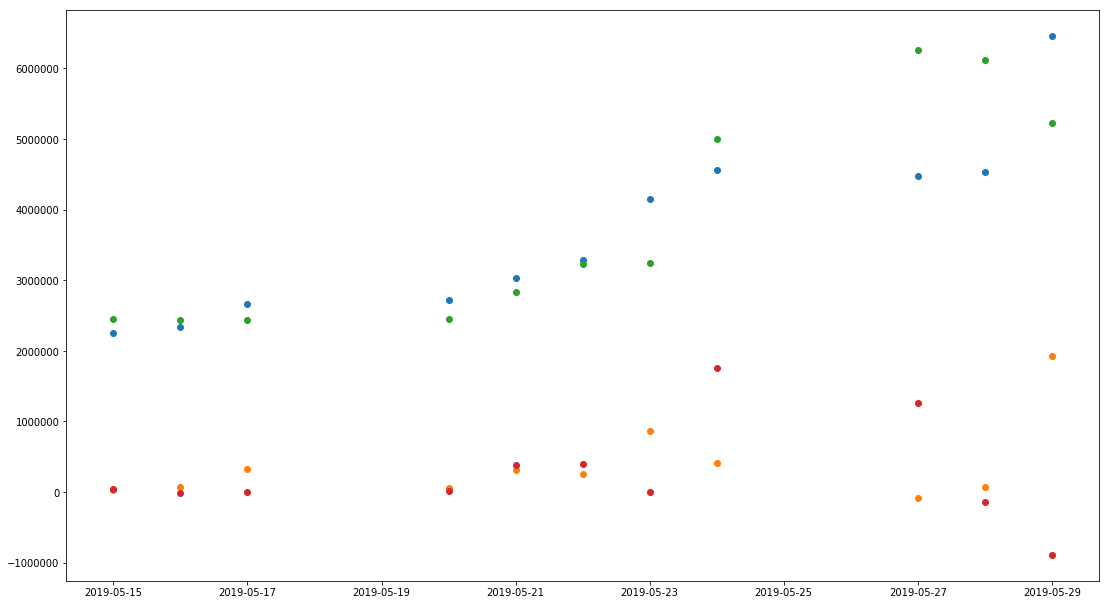

In [6]:


dates = matplotlib.dates.date2num(newDS['Date_CE'])
plt.plot_date(dates,newDS['Open Int_CE'])
plt.plot_date(dates,newDS['Change in OI_CE'])

plt.plot_date(dates,newDS['Open Int_PE'])
plt.plot_date(dates,newDS['Change in OI_PE'])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


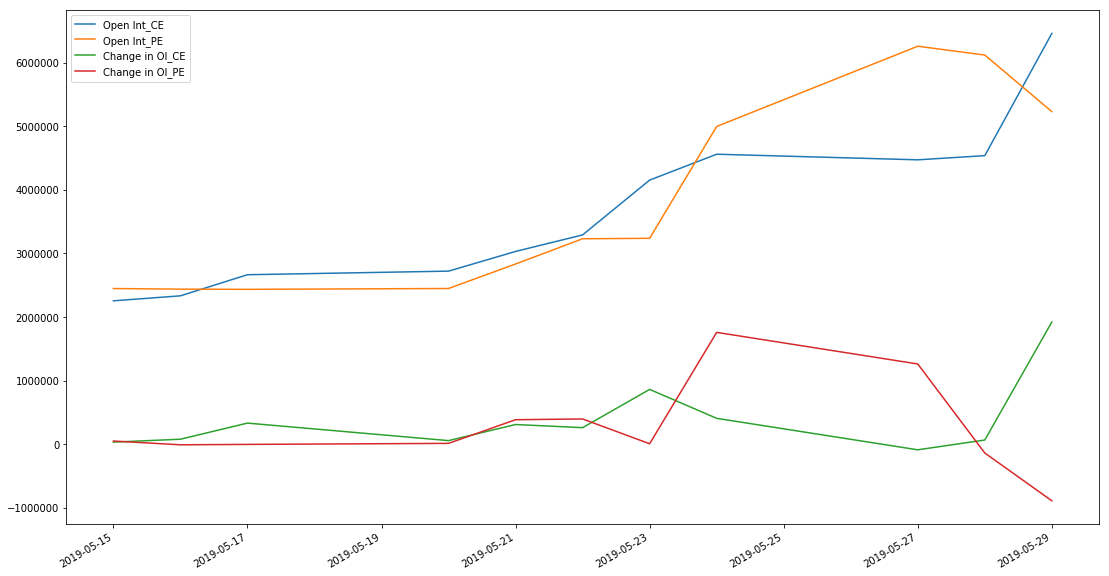

In [7]:
dates = newDS['Date_CE']
# y=newDS['Open Int_CE']
plt.plot(dates,newDS['Open Int_CE'])
plt.plot(dates,newDS['Open Int_PE'])

plt.plot(dates,newDS['Change in OI_CE'])
plt.plot(dates,newDS['Change in OI_PE'])


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()


## 